In [150]:
import nltk
import pandas as pd

In [96]:
file1 = open('pos.txt', encoding='utf8')
file2 = open('neg.txt', encoding = 'utf8')
file3 = open('ipod.txt', encoding= 'utf8')
pos = file1.read()
neg = file2.read()
ipod = file3.read()

In [112]:
pos

'films adapted from comic books have had plenty of success , whether they\'re about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there\'s never really been a comic book like from hell before . \nfor starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid \'80s with a 12-part series called the watchmen . \nto say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . \nthe book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . \nin other words , don\'t dismiss this film because of its source . \nif you can get past the whole comic book thing , you might find another stumbling block in from hell\'s directors , albert and allen hughes . \ngetting the hughes brothers to direct this seem

In [97]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [98]:
from nltk.tag import pos_tag, untag

In [99]:
from nltk import Text

text1 = Text(retokenize.tokenize(pos))
text2 = Text(retokenize.tokenize(neg))

text1
text2

<Text: plot two teen couples go to a church...>

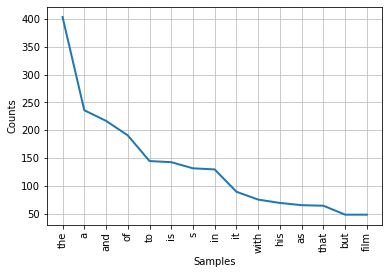

In [100]:
text1.plot(15)

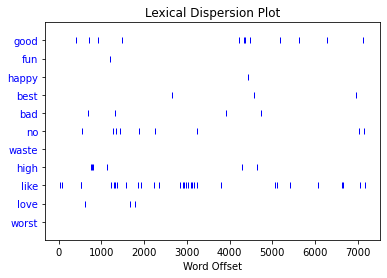

In [101]:
text1.dispersion_plot(['good','fun','happy','best','bad','no','waste','high','like','love','worst'])

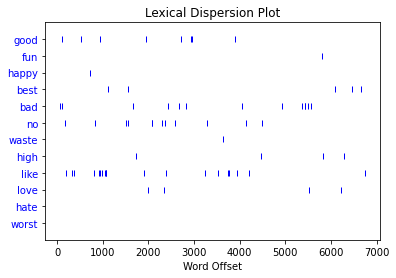

In [102]:
text2.dispersion_plot(['good','fun','happy','best','bad','no','waste','high','like','love','hate','worst'])

In [103]:
text1.similar('movie')

film reasons money shark caricature u country bronx villain congo
coalition bride groom


In [104]:
text1.common_contexts(['movie','film'])

the_becomes the_opens the_s


In [129]:
from nltk import FreqDist
from nltk.tag import pos_tag

stopwords = list(line.strip() for line in open('stopwords.txt'))

pos_tokens = pos_tag(retokenize.tokenize(pos))

neg_tokens = pos_tag(retokenize.tokenize(neg))


In [130]:
# stopwords 에 있는것 제외하고

names_list_pos = [t[0] for t in pos_tokens if t[1] =='NN' and t[0] not in stopwords]
fd_names_pos = FreqDist(names_list_pos)

names_list_neg = [t[0] for t in neg_tokens if t[1] =='NN' and t[0] not in stopwords]
fd_names_neg = FreqDist(names_list_neg)

In [131]:
print(fd_names_pos.N())
print(fd_names_neg.N())

1598
1419


In [144]:
fd_names_pos

FreqDist({'film': 49, 'performance': 17, 'story': 17, 'movie': 16, 'shark': 16, 't': 14, 'time': 13, 'lumumba': 13, 'life': 12, 'alda': 12, ...})

In [133]:
fd_names_neg

FreqDist({'film': 40, 'movie': 34, 'time': 16, 'way': 13, 'something': 12, 't': 11, 'audience': 10, 'man': 10, 'john': 10, 'plot': 9, ...})

In [134]:
fd_names_pos.freq('good')

0.0006257822277847309

In [135]:
print(fd_names_pos.most_common(5))
print(fd_names_neg.most_common(5))

[('film', 49), ('performance', 17), ('story', 17), ('movie', 16), ('shark', 16)]
[('film', 40), ('movie', 34), ('time', 16), ('way', 13), ('something', 12)]


In [152]:
lst1 = fd_names_pos.most_common(5)
lst2 = fd_names_neg.most_common(5)
df1 = pd.DataFrame(lst1, columns = ['Word','Count'])
df2 = pd.DataFrame(lst2, columns = ['Word','Count'])

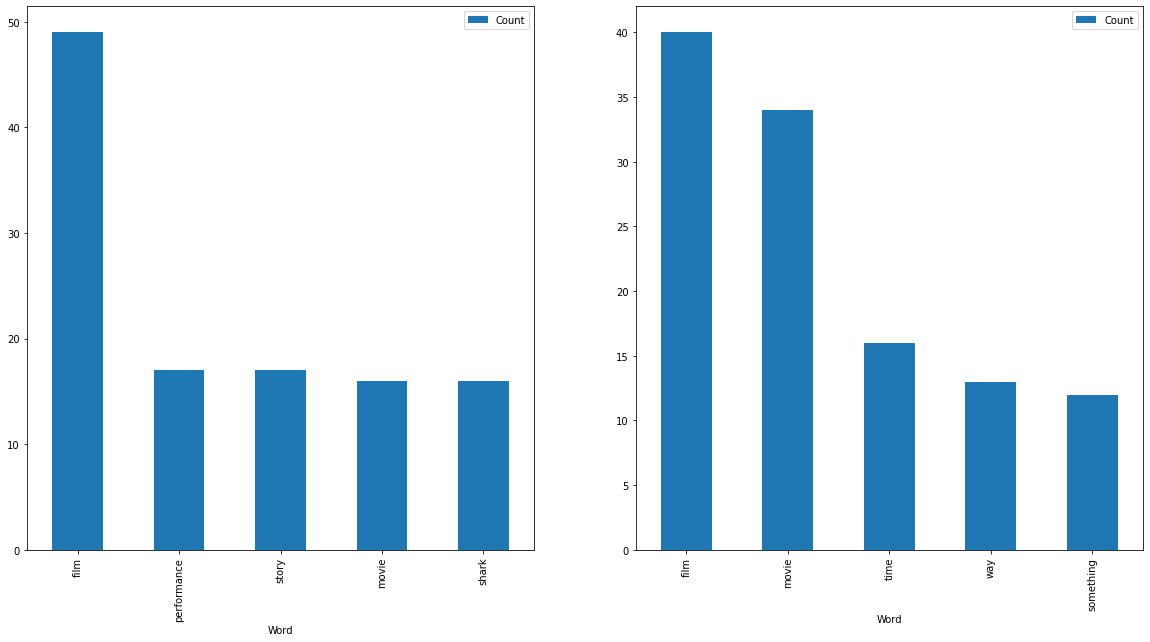

In [155]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(1,2,1)
df1.plot.bar(x='Word',y='Count',ax = ax1)

ax2 = fig.add_subplot(1,2,2)
df2.plot.bar(x='Word',y='Count',ax = ax2)

plt.show()

In [136]:
import matplotlib.pyplot as plt

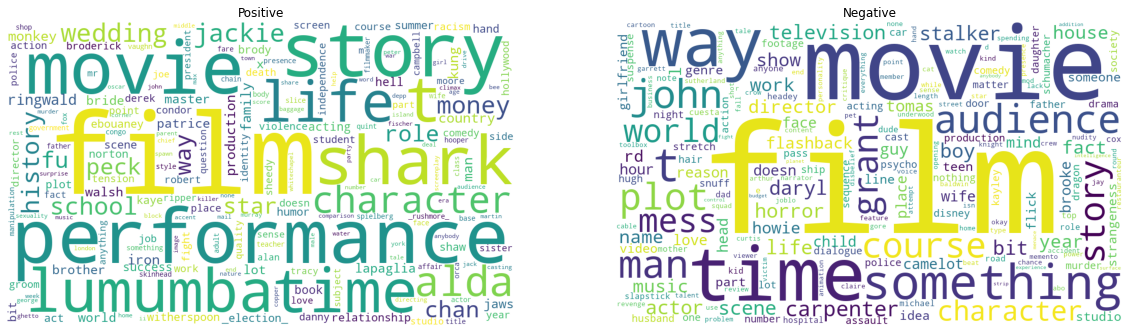

In [137]:
from wordcloud import WordCloud

fig = plt.figure(figsize = (20,10))

wc = WordCloud(width=1000, height=600,
               background_color='white',
              random_state=0)

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(wc.generate_from_frequencies(fd_names_pos))
ax1.set_title('Positive')
plt.axis("off")

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(wc.generate_from_frequencies(fd_names_neg))
ax2.set_title('Negative')
plt.axis("off")

plt.show()